In [240]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Intoduction

Data source: https://www.kaggle.com/datasets/adilashrafi/bank-marketing-classification-task?resource=download

### What does this data frame contain?

Bank Client Data:
* **age** (numeric)
* **job** : Type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar", "self-employed","retired","technician","services")
* **marital** : Marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
* **education** (categorical: "unknown","secondary","primary","tertiary")
* **default**: Has credit in default? (binary: "yes","no")
* **balance**: Average yearly balance, in euros (numeric)
* **housing**: Has housing loan? (binary: "yes","no")
* **loan**: Has personal loan? (binary: "yes","no")

Related with the Last Contact of the Current Campaign:
* **contact**: Contact communication type (categorical: "unknown","telephone","cellular")
* **day**: Last contact day of the month (numeric)
* **month**: Last contact month of the year (categorical: "jan", "feb", "mar", …, "nov", "dec")
* **duration**: Last contact duration, in seconds (numeric)

Other Attributes:
* **campaign**: Number of contacts performed during this campaign and for this client (numeric, includes last contact)
* **pdays**: Number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means the client was not
previously contacted)
* **previous**: Number of contacts performed before this campaign and for this client (numeric)
* **poutcome**: Outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

Output Variable (Desired Target):
* **y** - Has the client subscribed to a term deposit? (binary: "yes","no")

# Data import

In [241]:
bank_data_df = pd.read_csv('datasource/bank_data.csv')

### Data split

In [242]:
X_model, X_validate, y_model, y_validate = train_test_split(
    bank_data_df[bank_data_df.columns.values[:-1]],
    bank_data_df[bank_data_df.columns.values[-1]],
    test_size=0.2,
    stratify=bank_data_df[bank_data_df.columns.values[-1]],
    random_state=42,
)

In [243]:
pd.concat([X_model,y_model], axis=1).to_csv('datasource/bank_data_model.csv', index= False)
pd.concat([X_validate,y_validate], axis=1).to_csv('datasource/bank_data_validate.csv', index= False)

In [244]:
bank_data_df = pd.read_csv('datasource/bank_data_model.csv')

EDA
--------------------------

In [245]:
bank_data_df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,2236,32,admin.,divorced,secondary,yes,-18,yes,no,unknown,12,may,155,3,-1,0,unknown,no
1,858,34,technician,single,tertiary,no,144,yes,yes,cellular,14,oct,104,1,85,19,failure,no
2,3531,44,management,divorced,tertiary,no,0,no,no,cellular,22,aug,54,2,-1,0,unknown,no
3,2737,34,blue-collar,married,secondary,no,8309,yes,yes,cellular,19,nov,50,1,-1,0,unknown,no
4,1257,51,blue-collar,married,primary,no,5050,no,yes,unknown,16,jun,75,7,-1,0,unknown,no


In [246]:
bank_data_df.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000
mean,2240.352046,41.043971,1403.934458,16.040929,263.769358,2.795354,40.218473,0.545907
std,1302.788861,10.464800,2811.286428,8.207003,260.675975,3.144846,100.170192,1.657239
min,0.000000,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,1113.750000,33.000000,65.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,2241.500000,39.000000,450.500000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,3359.500000,48.000000,1477.750000,21.000000,330.000000,3.000000,-1.000000,0.000000
max,4520.000000,87.000000,42045.000000,31.000000,3025.000000,50.000000,871.000000,24.000000


In [247]:
bank_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3616 non-null   int64 
 1   age         3616 non-null   int64 
 2   job         3616 non-null   object
 3   marital     3616 non-null   object
 4   education   3616 non-null   object
 5   default     3616 non-null   object
 6   balance     3616 non-null   int64 
 7   housing     3616 non-null   object
 8   loan        3616 non-null   object
 9   contact     3616 non-null   object
 10  day         3616 non-null   int64 
 11  month       3616 non-null   object
 12  duration    3616 non-null   int64 
 13  campaign    3616 non-null   int64 
 14  pdays       3616 non-null   int64 
 15  previous    3616 non-null   int64 
 16  poutcome    3616 non-null   object
 17  y           3616 non-null   object
dtypes: int64(8), object(10)
memory usage: 508.6+ KB


What we can clearly see is that there are no null observations. 
We decided to save our target value's name into targe_value variable.

In [248]:
target_value = 'y'

Analysis of numeric values
--------------------------

### Distribution

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>, <Axes: >]], dtype=object)

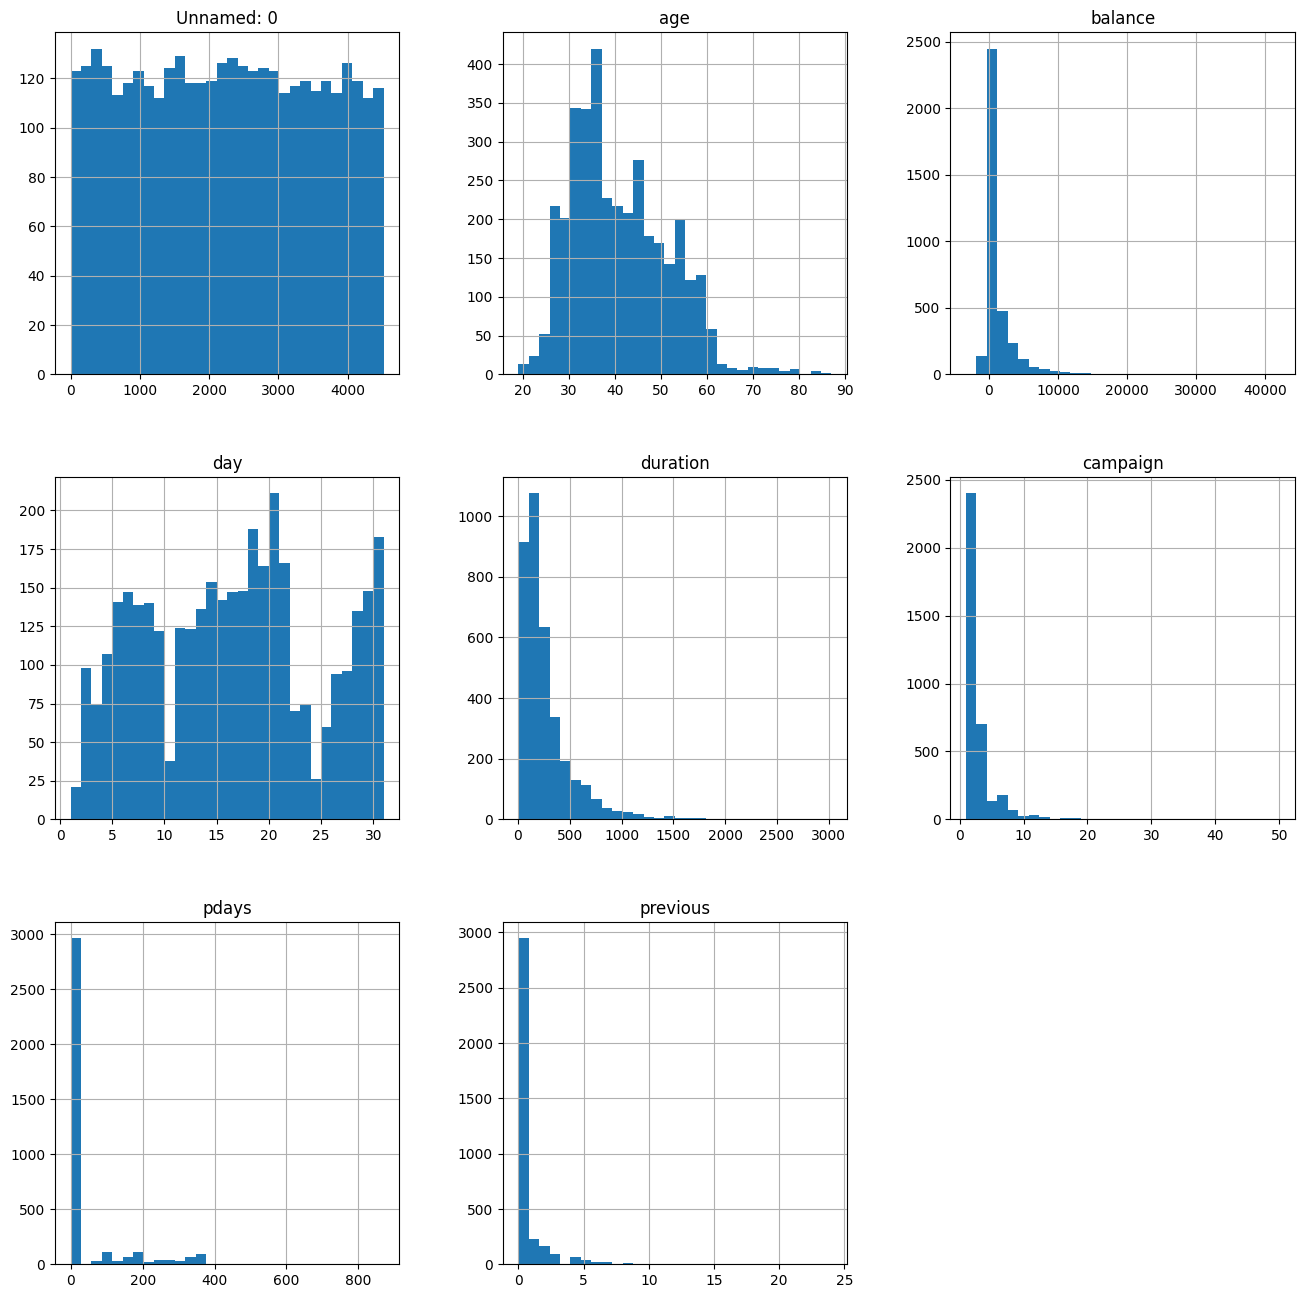

In [249]:
bank_data_df.hist(bins= 30, figsize=(16,16))

We found that one value contains just rows' indexes, so we decided to delete it 

In [250]:
bank_data_df = bank_data_df.iloc[:,1:]

In [251]:
numeric_values = bank_data_df.select_dtypes(include=np.number).columns.values
print(numeric_values)
print(type(numeric_values))
print(type(numeric_values[1]))
print(len(numeric_values))

['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous']
<class 'numpy.ndarray'>
<class 'str'>
7


In [252]:
bank_data_df[numeric_values].head()

,age,balance,day,duration,campaign,pdays,previous
0,32,-18,12,155,3,-1,0
1,34,144,14,104,1,85,19
2,44,0,22,54,2,-1,0
3,34,8309,19,50,1,-1,0
4,51,5050,16,75,7,-1,0


### Are there some obvious corellations beetween target and features?

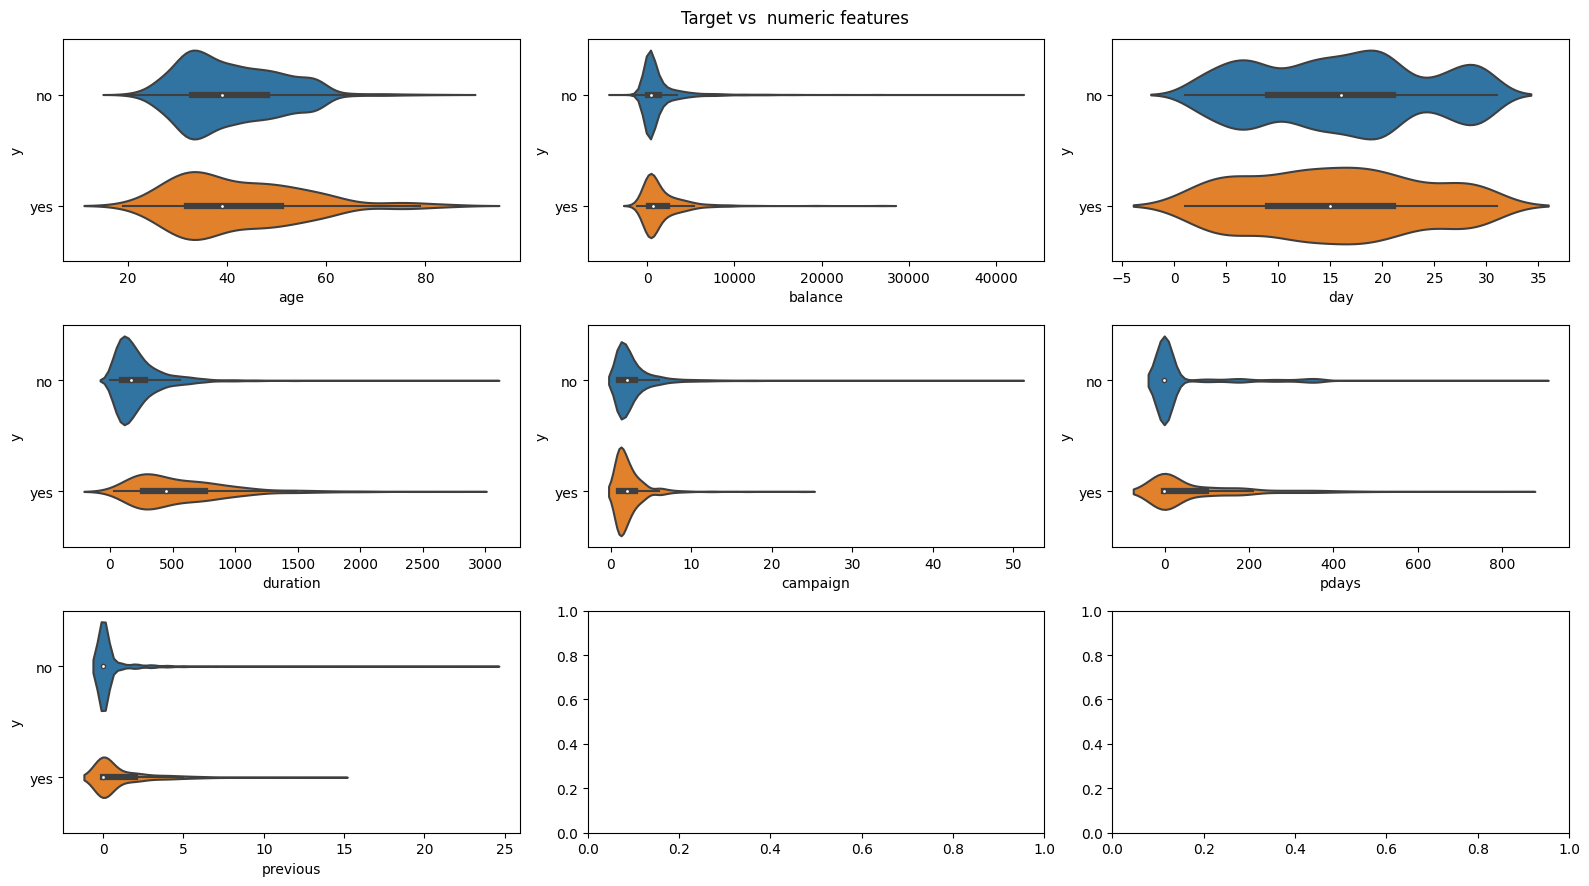

In [253]:
fig, axs = plt.subplots(3,3,figsize = (16,9))
axs = axs.flatten()
for i, col in enumerate(bank_data_df[numeric_values].columns):
    sns.violinplot(data=bank_data_df, x = col, y = target_value, ax = axs[i])

plt.suptitle("Target vs  numeric features")
plt.tight_layout()

/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/s

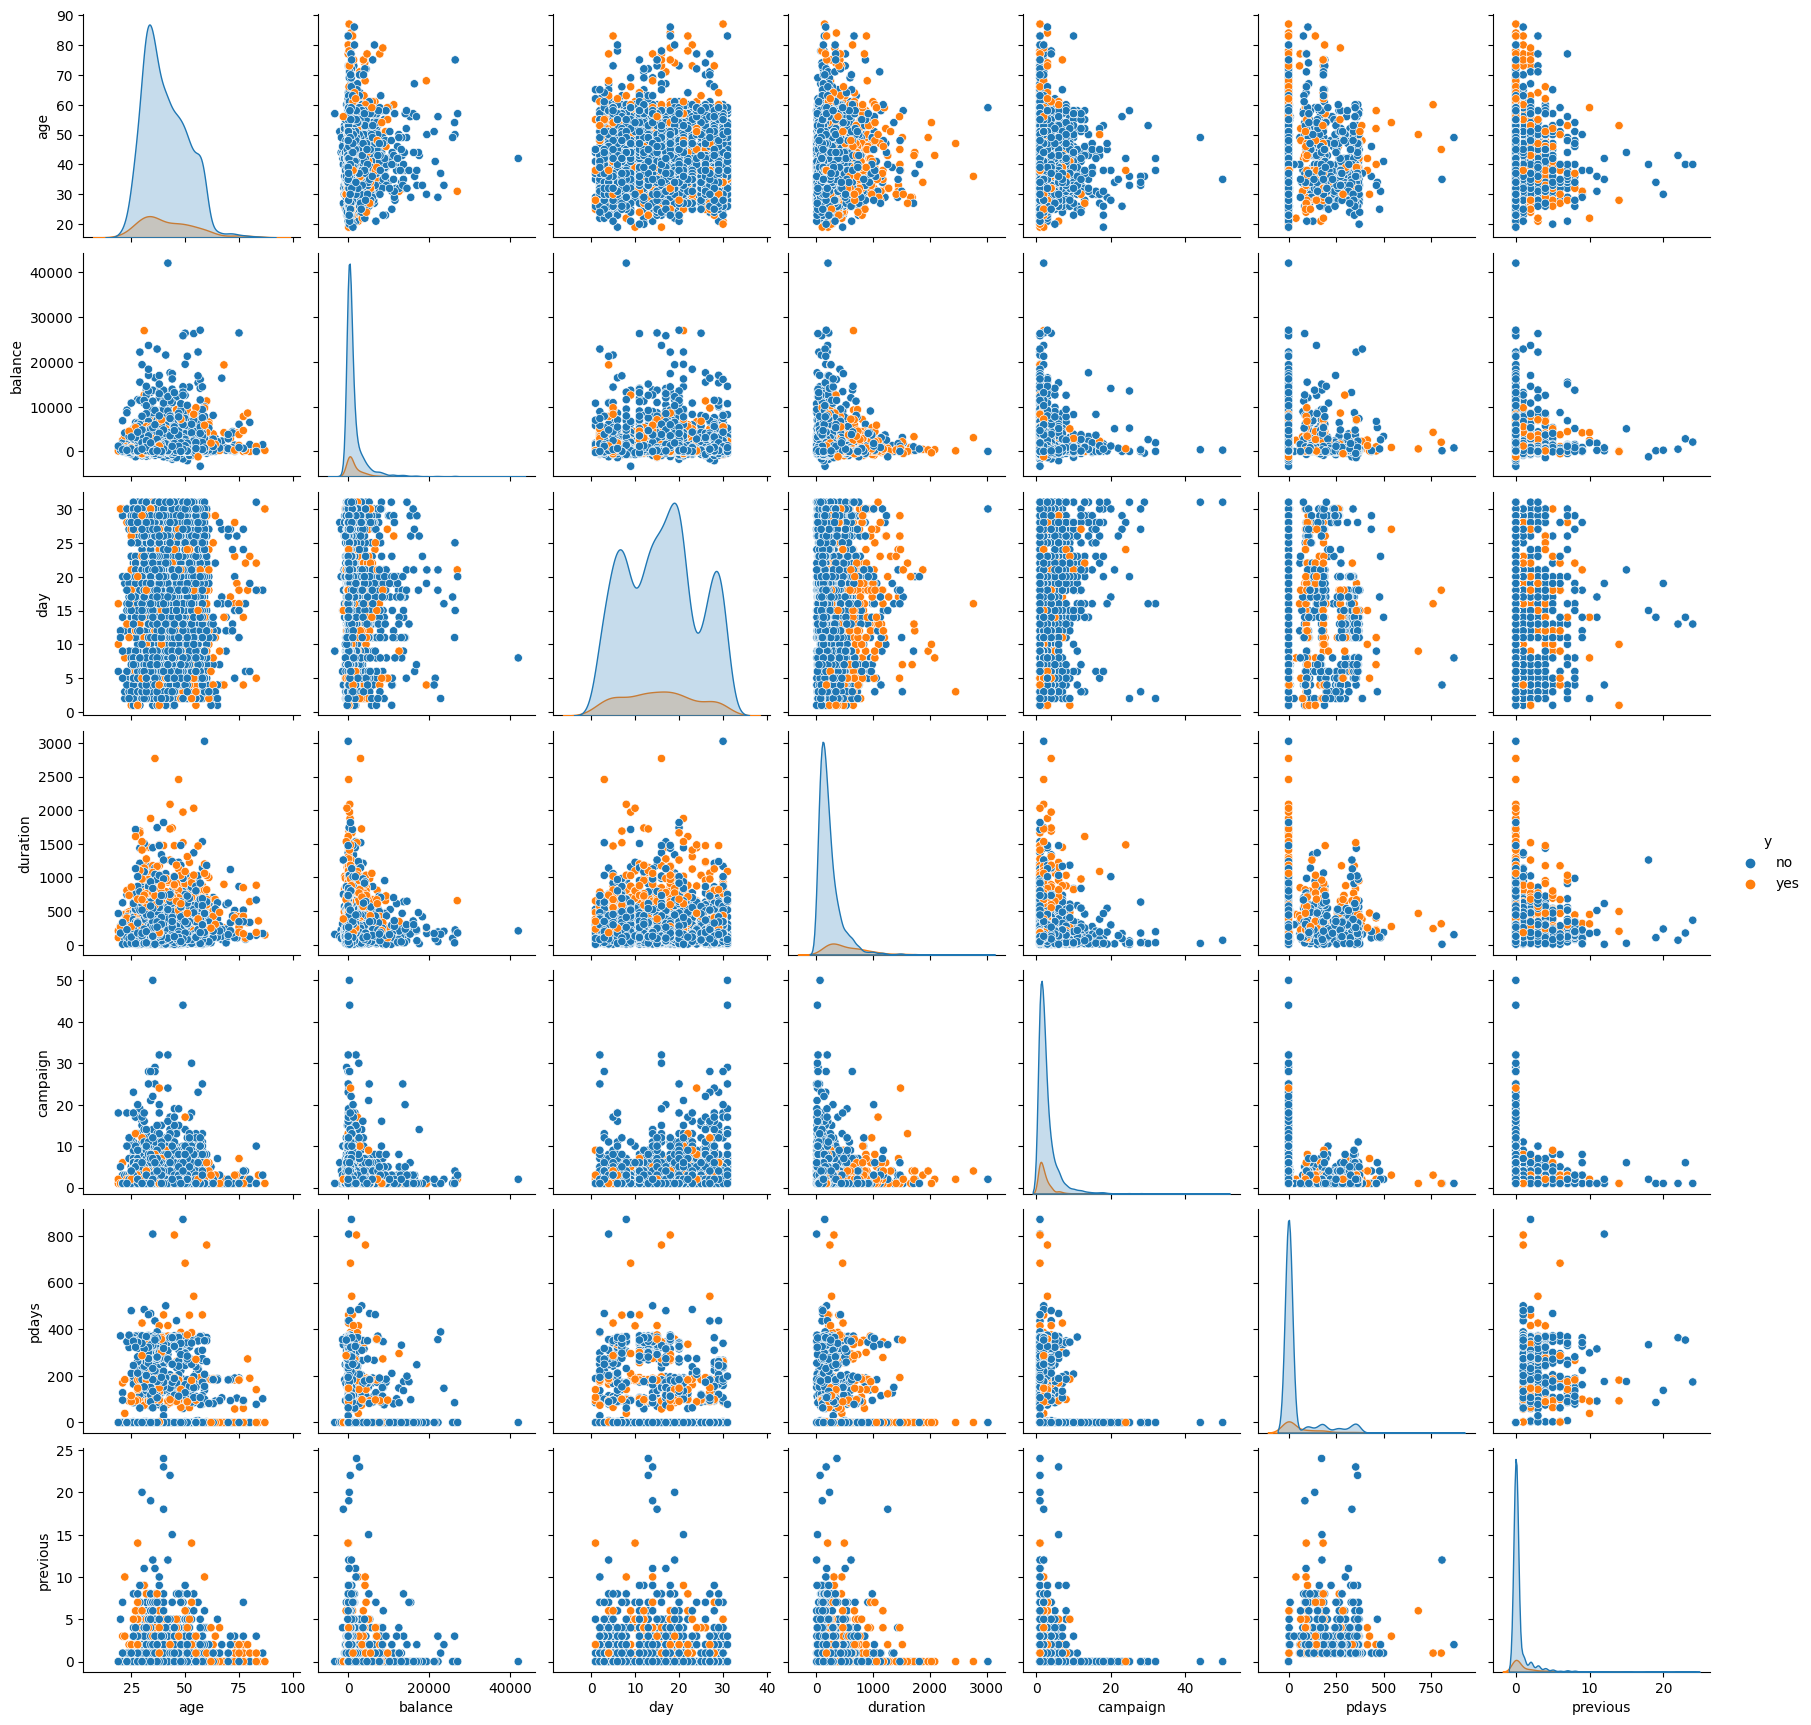

In [254]:
sns.pairplot(bank_data_df, hue=target_value)

#### For further analysis, we converted target_value to numeric values

In [255]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_target_value = le.fit_transform(bank_data_df[target_value])
bank_data_df[target_value] = new_target_value
le.get_params()

{}

<Axes: >

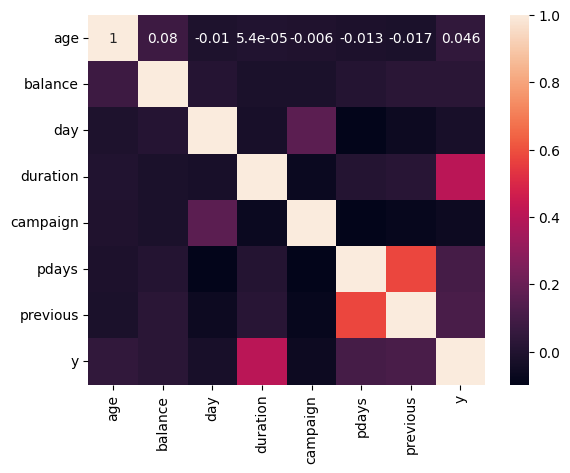

In [256]:
sns.heatmap(bank_data_df[np.append(numeric_values, np.array(target_value))].corr(), annot= True)

As we expected, our target value is more-less correlated with duration of the last contact. Tha makes sense because if a person talks longer to a consultant, he/she is getting more convinced to subscribe a term deposit.

# Analisys of non numeric values

In [257]:
non_numeric_values = bank_data_df.drop(columns=numeric_values).columns.values

In [258]:
non_numeric_values

array(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome', 'y'], dtype=object)

#### We see that we have some datetime values describing observations. Let's see if and how they affects target value

In [259]:
bank_data_df['month']

0       may
1       oct
2       aug
3       nov
4       jun
       ... 
3611    jun
3612    feb
3613    jul
3614    jun
3615    nov
Name: month, Length: 3616, dtype: object

In [260]:
import calendar
month_num_dict = {month.lower(): index for index, month in enumerate(calendar.month_abbr) if month}
month_num_dict

{'jan': 1,
 'feb': 2,
 'mar': 3,
 'apr': 4,
 'may': 5,
 'jun': 6,
 'jul': 7,
 'aug': 8,
 'sep': 9,
 'oct': 10,
 'nov': 11,
 'dec': 12}

In [261]:
bank_data_df['month'] = bank_data_df['month'].map(month_num_dict)
bank_data_df['month']

0        5
1       10
2        8
3       11
4        6
        ..
3611     6
3612     2
3613     7
3614     6
3615    11
Name: month, Length: 3616, dtype: int64

In [262]:
bank_data_df['year'] = np.repeat(2024, repeats= len(bank_data_df[target_value]))
bank_data_df['day_of_the_year'] = pd.to_datetime(bank_data_df[["year","month","day"]])
bank_data_df['day_of_the_year'] = bank_data_df['day_of_the_year'].apply(lambda x: x.dayofyear)
time_df = bank_data_df.groupby(['day_of_the_year','y'], as_index= False).size()

In [263]:
time_df.head()

,day_of_the_year,y,size
0,7,0,1
1,11,1,1
2,12,0,1
3,14,0,1
4,14,1,2


In [264]:
time_df.describe()

,day_of_the_year,y,size
count,400.000000,400.000000,400.000000
mean,180.805000,0.467500,9.040000
std,91.058394,0.499567,14.690232
min,7.000000,0.000000,1.000000
25%,112.750000,0.000000,1.000000
50%,182.000000,0.000000,2.000000
75%,245.250000,1.000000,7.000000
max,366.000000,1.000000,87.000000


In [265]:
contacts_per_day_df = bank_data_df.groupby("day_of_the_year", as_index= False).size()
contacts_per_day_df = contacts_per_day_df.rename({"size" : "contacts_per_day"}, axis="columns")
time_df = time_df.join(contacts_per_day_df.set_index("day_of_the_year"), on = "day_of_the_year")
time_df["percent_of_contacts"] = time_df["size"] * 100/ time_df["contacts_per_day"]

In [266]:
time_df.head()

,day_of_the_year,y,size,contacts_per_day,percent_of_contacts
0,7,0,1,1,100.000000
1,11,1,1,1,100.000000
2,12,0,1,1,100.000000
3,14,0,1,3,33.333333
4,14,1,2,3,66.666667


In [267]:
time_df.isna().mean(axis=0)

day_of_the_year        0.0
y                      0.0
size                   0.0
contacts_per_day       0.0
percent_of_contacts    0.0
dtype: float64

In [268]:
time_df.loc[time_df[target_value] == "yes"].describe()

,day_of_the_year,y,size,contacts_per_day,percent_of_contacts
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN


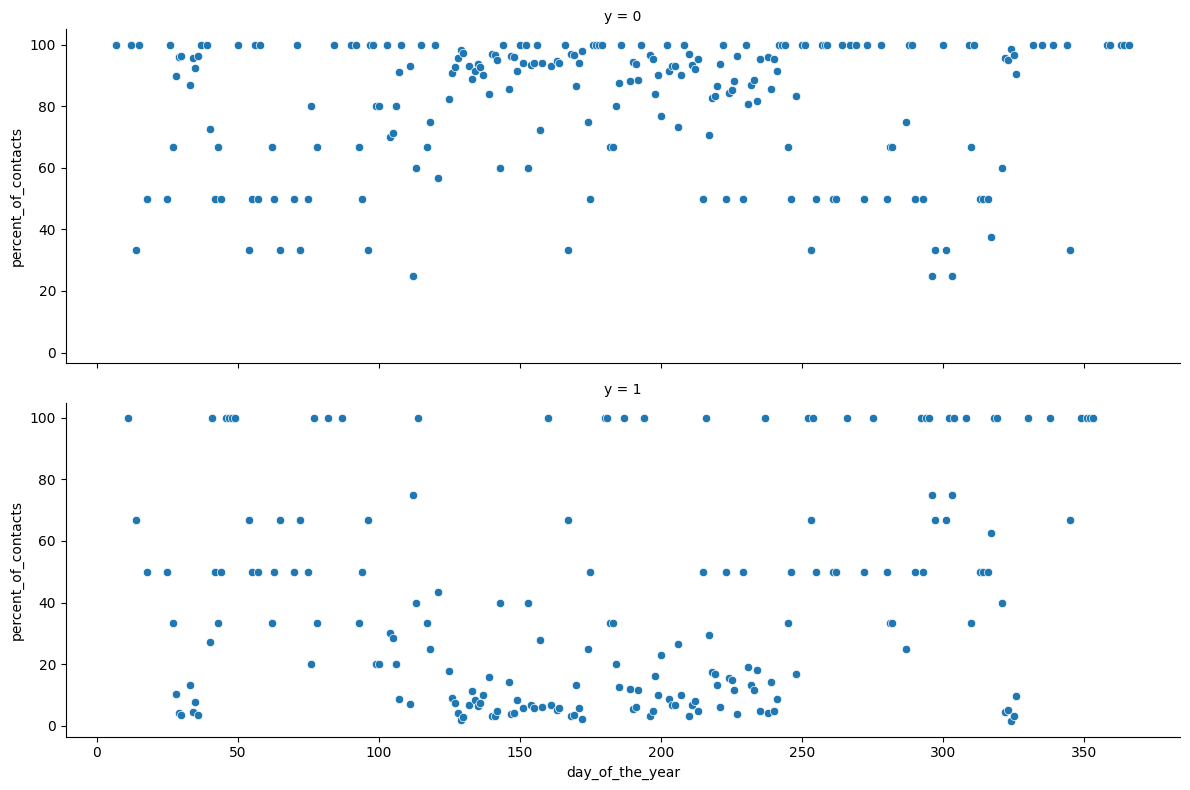

In [269]:
g = sns.FacetGrid(time_df, row = "y", height= 4, aspect= 3)
g.map(sns.scatterplot, "day_of_the_year", "percent_of_contacts")

/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/krzysztof/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

<Axes: xlabel='day_of_the_year', ylabel='size'>

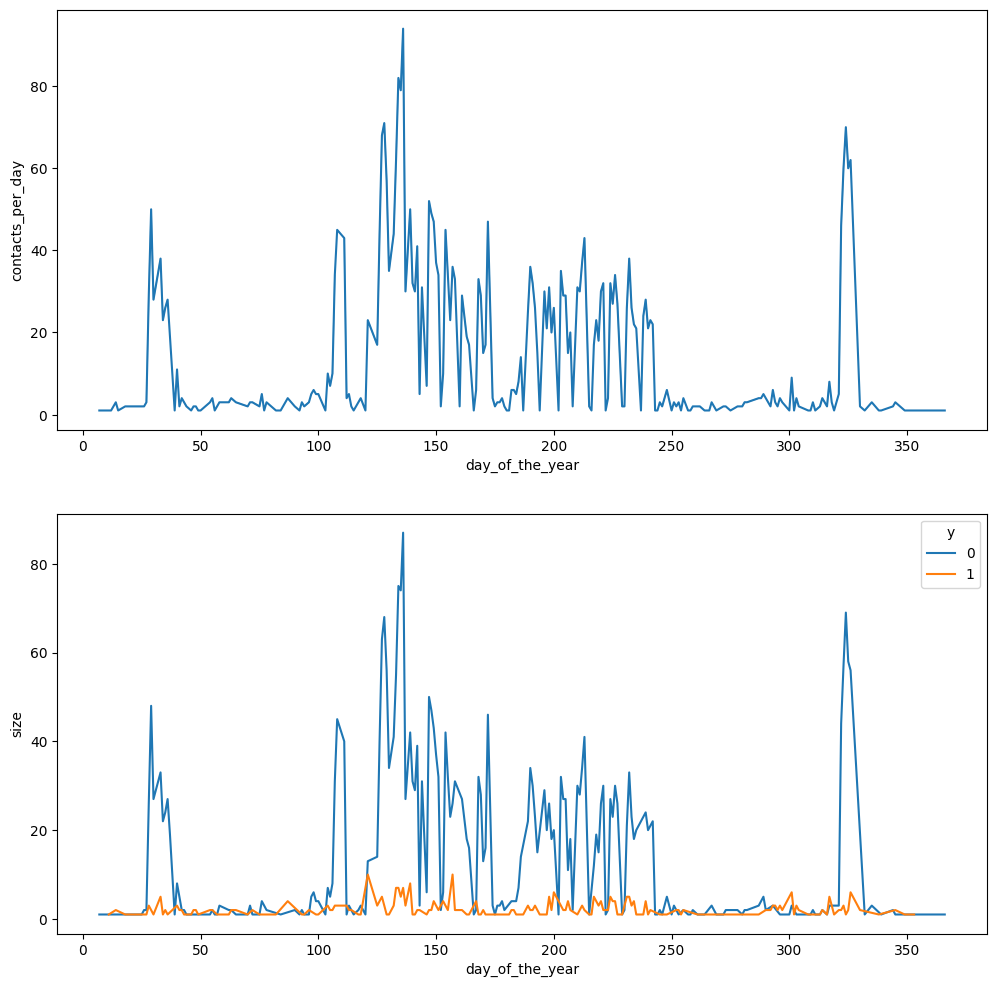

In [270]:
fig, ax = plt.subplots(2,1,figsize = (12,12))
ax = ax.flatten()
sns.lineplot(data= time_df, x = "day_of_the_year", y = "contacts_per_day", ax= ax[0], )
#sns.lineplot(data= time_df.loc[time_df[target_value]=="yes"], x = "day_of_the_year", y = "size",ax=ax[1])
sns.lineplot(data= time_df, x = "day_of_the_year", y = "size",ax=ax[1], hue="y")

In [271]:
only_months_df = bank_data_df.groupby(["month", "y"], as_index= False).size()

In [272]:
only_months_df.head()

,month,y,size
0,1,0,111
1,1,1,12
2,2,0,148
3,2,1,29
4,3,0,20


<Axes: xlabel='month', ylabel='size'>

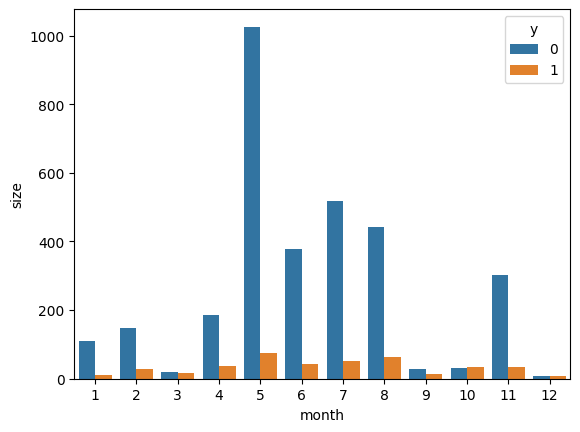

In [273]:
sns.barplot(data= only_months_df, x='month', y='size', hue="y")

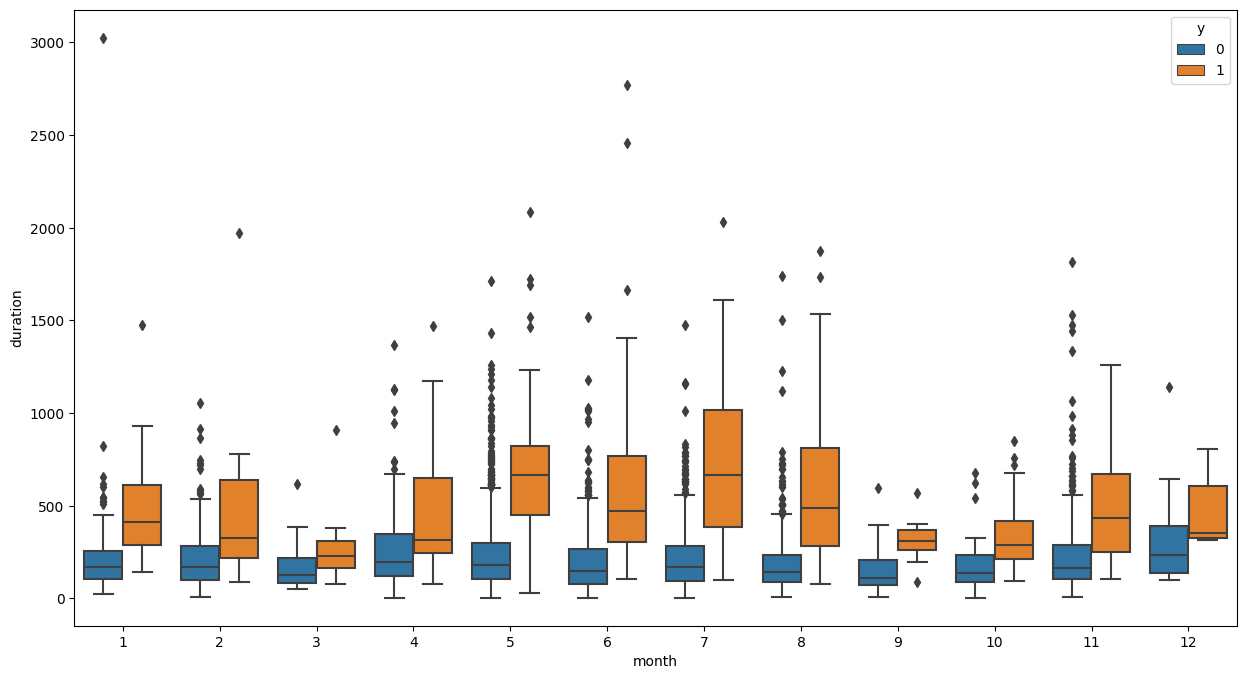

In [274]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(data= bank_data_df, x = "month", y = "duration", hue= "y")

### Saving first data manipulations

In [275]:
bank_data_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,year,day_of_the_year
0,32,admin.,divorced,secondary,yes,-18,yes,no,unknown,12,5,155,3,-1,0,unknown,0,2024,133
1,34,technician,single,tertiary,no,144,yes,yes,cellular,14,10,104,1,85,19,failure,0,2024,288
2,44,management,divorced,tertiary,no,0,no,no,cellular,22,8,54,2,-1,0,unknown,0,2024,235
3,34,blue-collar,married,secondary,no,8309,yes,yes,cellular,19,11,50,1,-1,0,unknown,0,2024,324
4,51,blue-collar,married,primary,no,5050,no,yes,unknown,16,6,75,7,-1,0,unknown,0,2024,168


In [276]:
bank_data_df.drop(columns=["day", "month", "year"]).to_csv("datasource/bank_data_df_changed_time.csv")

In [277]:
bank_data_df = pd.read_csv("datasource/bank_data_df_changed_time.csv")
bank_data_df = bank_data_df.iloc[:,1:]

#### Job

<Axes: xlabel='job'>

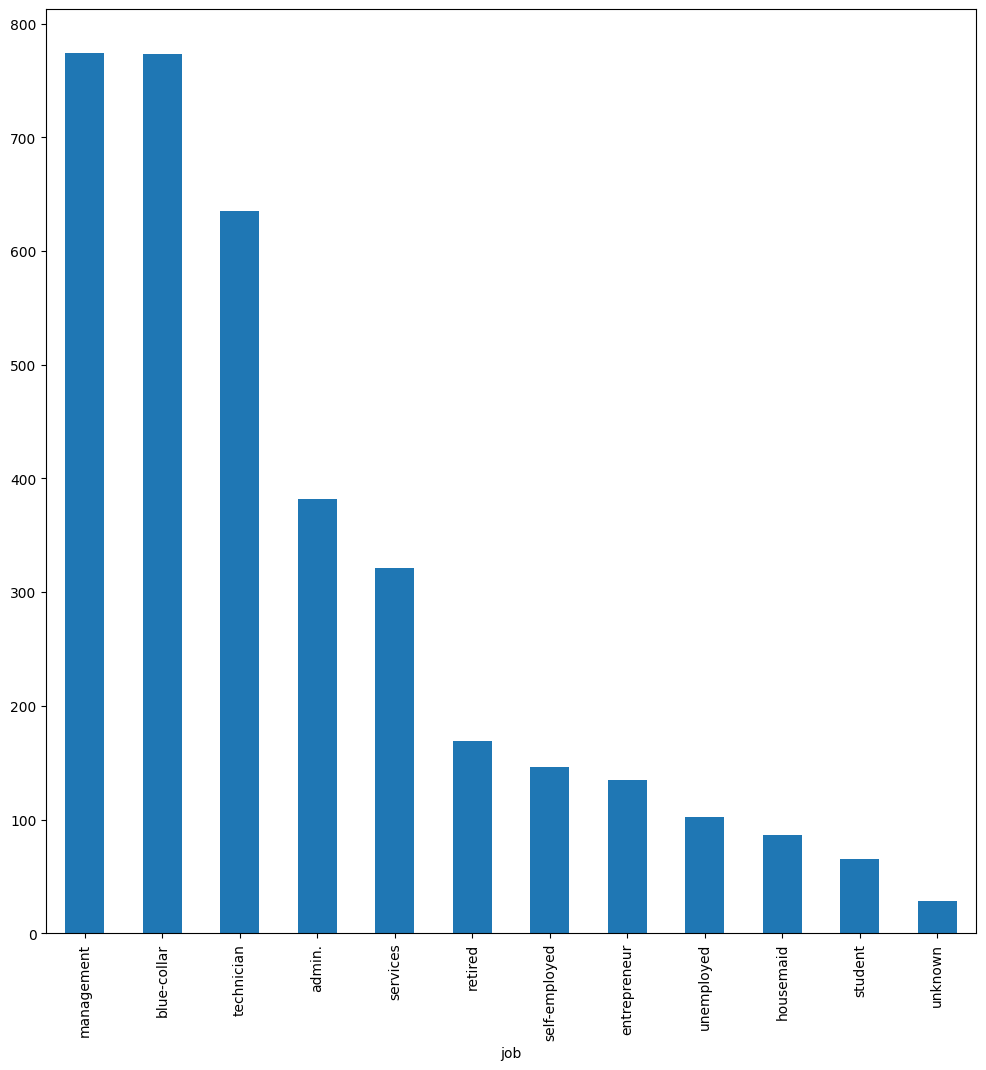

In [278]:
bank_data_df["job"].value_counts().plot(kind = "bar", figsize= (12,12))

<Axes: xlabel='job'>

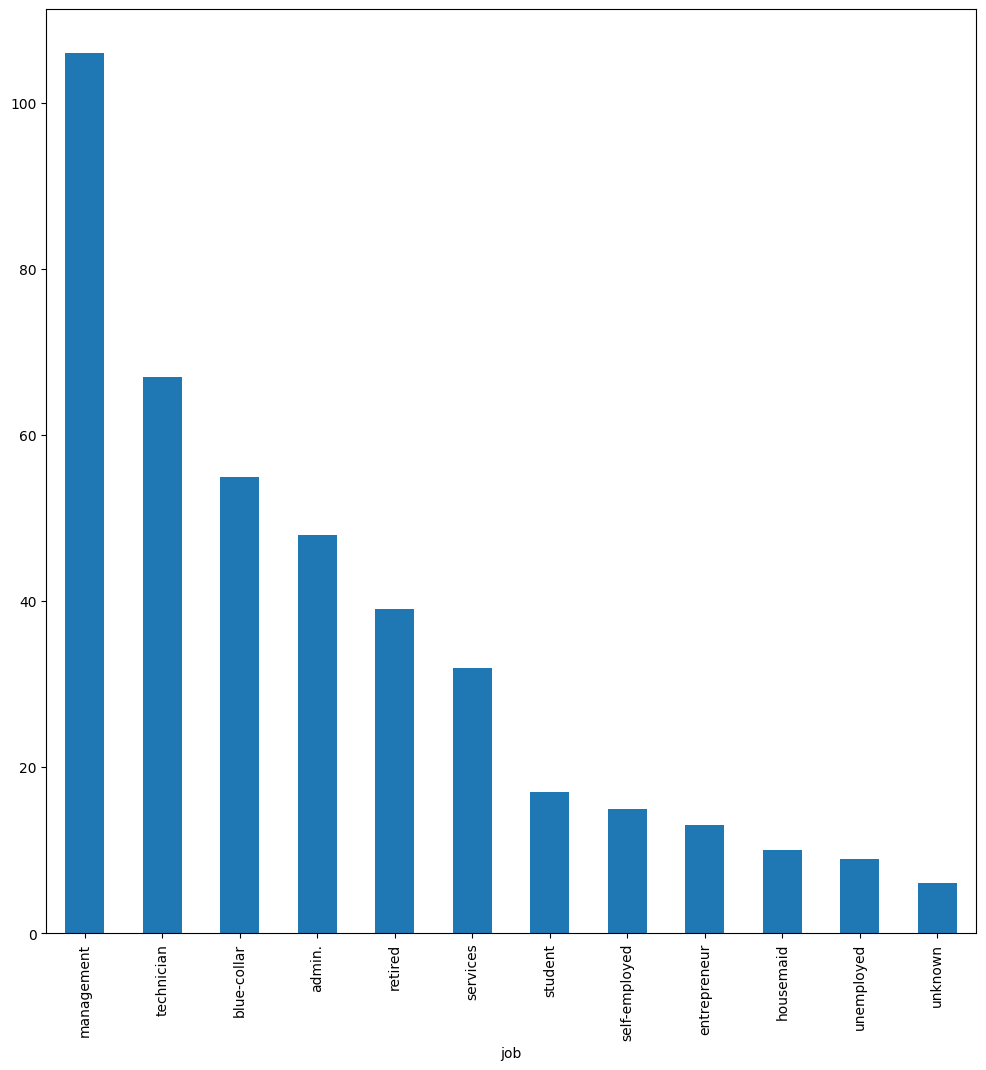

In [279]:
bank_data_df.loc[bank_data_df[target_value] == 1]["job"].value_counts().plot(kind = "bar", figsize= (12,12))

<Axes: xlabel='balance', ylabel='job'>

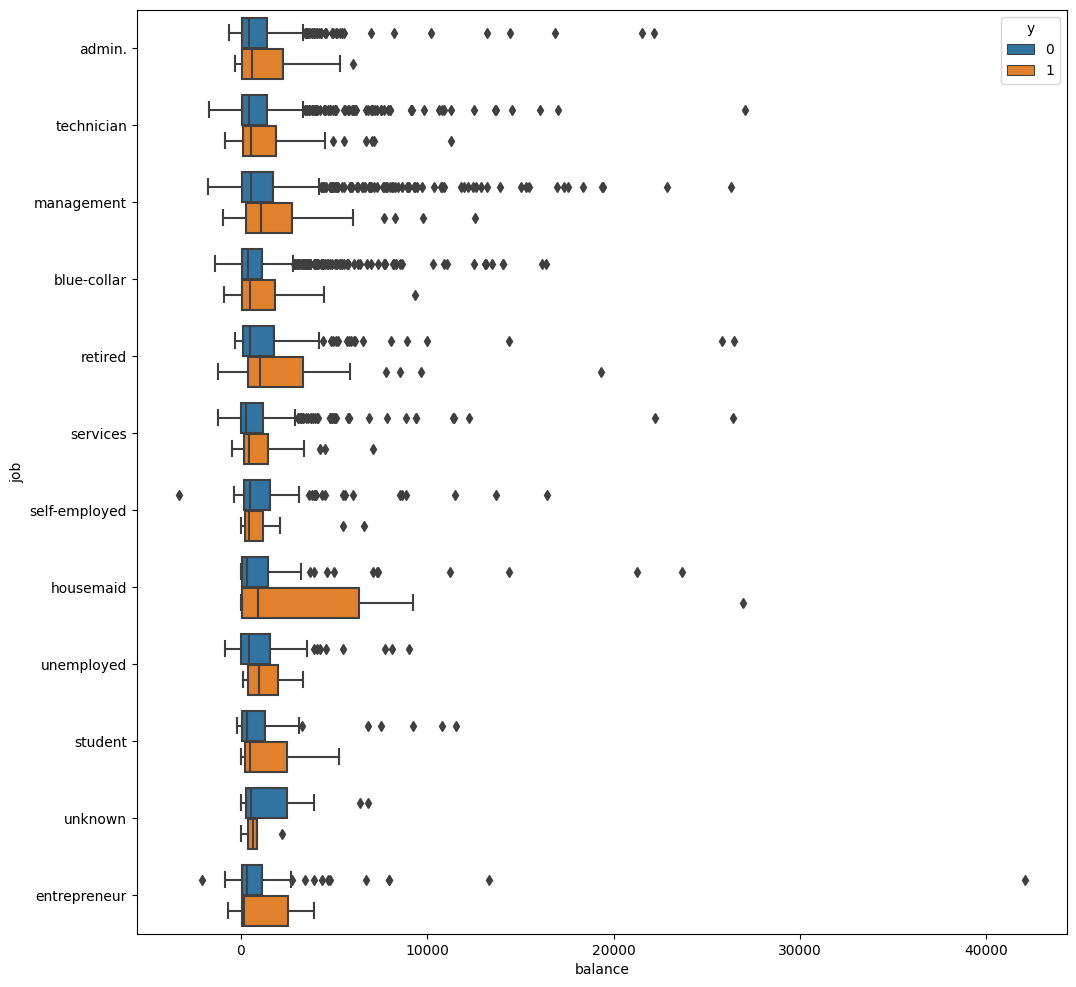

In [280]:
plt.figure(figsize=(12,12))
sns.boxplot(data=bank_data_df, y= "job", x = "balance", hue = target_value)

For majority of job types, people with higher balance are more eager to sign to term deposit.

Maybe, it is a good idea to make less job categories, f.e: (enterpeneur, self-employed), housemaid, unknown, (admin, technician,blue-colar,services), retired. Categories in bracets are combined into one.

# Features importance analisys

Inspiration: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

For now, we just straight convert all non numeric values into numeric ones

In [281]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
new_bank_df = oe.fit_transform(bank_data_df.loc[:, bank_data_df.columns != target_value],bank_data_df[target_value])

In [282]:
from sklearn.ensemble import RandomForestClassifier

feature_names = bank_data_df.loc[:, bank_data_df.columns != target_value].columns.values
forest = RandomForestClassifier(random_state=0)
forest.fit(new_bank_df, bank_data_df[target_value])

RandomForestClassifier(random_state=0)

In [283]:
feature_names

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'day_of_the_year'], dtype=object)

In [284]:
import time

import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.007 seconds


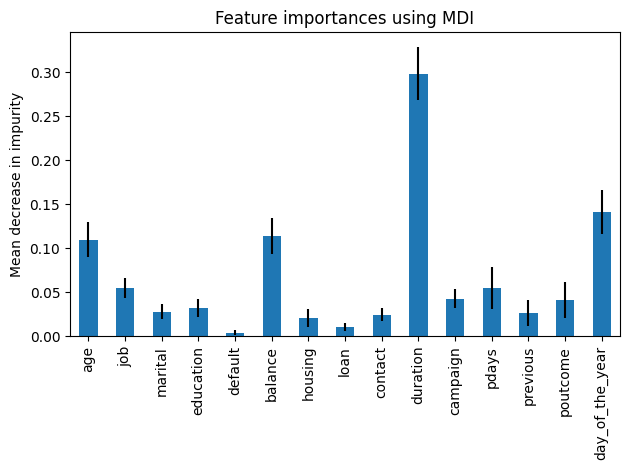

In [285]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

As we expected, the highest impact on target value have following features: age, job, balance, duration and day_of_the_year. If we think about it for a while, that makes sense in real world.

In [286]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, new_bank_df,bank_data_df[target_value], n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 2.196 seconds


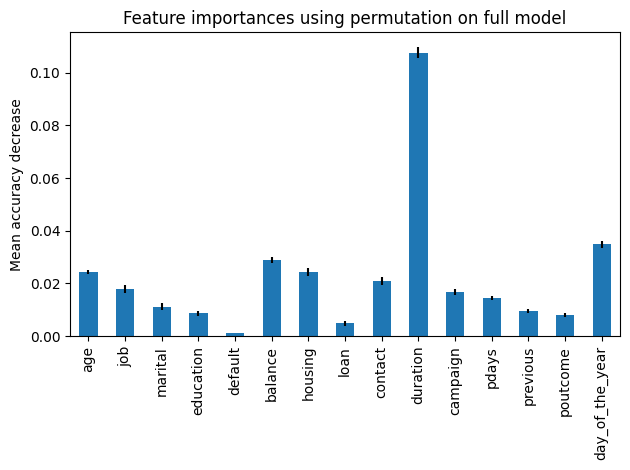

In [287]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()